In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv('Hitters.csv')

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
df.shape

(322, 20)

In [7]:
df.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.0,A


In [8]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [9]:
df.sort_values('Salary',ascending=False)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,A,E,1045,88,13,2460.000,A
163,618,200,20,98,110,62,13,7127,2163,351,1104,1289,564,A,E,330,16,8,2412.500,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,A,E,1377,100,6,1975.000,A
229,514,144,0,67,54,79,9,4739,1169,13,583,374,528,N,E,229,453,15,1940.000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,289,63,7,36,41,44,17,7402,1954,195,1115,919,1153,A,W,166,211,7,NaN,A
298,181,46,1,19,18,17,5,937,238,9,88,95,104,A,E,37,98,9,NaN,A
302,200,51,2,14,29,25,23,9778,2732,379,1272,1652,925,N,W,398,29,7,NaN,N
305,580,194,9,91,62,78,8,3372,1028,48,604,314,469,N,E,270,13,6,NaN,N


In [10]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [11]:
df['Experience'] = pd.cut(df['Years'],4)

pd.cut(df['Years'],4).value_counts()

(0.977, 6.75]    172
(6.75, 12.5]      90
(12.5, 18.25]     55
(18.25, 24.0]      5
Name: Years, dtype: int64

In [12]:
df['Experience'] = pd.cut(df['Years'],[0,5,10,15,25],labels=[1,2,3,4])
df.groupby(['League','Division', 'Experience']).agg({'Salary':'mean'})

Salary
League Division Experience            
A      E        1           427.159091
                2           787.252400
                3           816.311353
                4           665.416750
       W        1           223.935897
                2           609.479188
                3           835.250000
                4           480.416667
N      E        1           325.930097
                2           812.394684
                3           894.322667
                4           662.500000
       W        1           287.354167
                2           539.393955
                3           721.894000
                4           665.555500

In [13]:
df['Salary'] = df['Salary'].fillna(df.groupby(['League','Division', 'Experience'])['Salary'].transform('mean'))

In [14]:
df.describe([0.01, 0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
AtBat,322.0,380.928571,153.404981,16.0,20.42,161.00,194.1,255.250000,379.50,512.00,584.9,609.90,658.59,687.0
Hits,322.0,101.024845,46.454741,1.0,4.42,39.00,45.1,64.000000,96.00,137.00,163.0,174.00,210.79,238.0
HmRun,322.0,10.770186,8.709037,0.0,0.00,0.00,1.0,4.000000,8.00,16.00,24.0,28.95,33.00,40.0
Runs,322.0,50.909938,26.024095,0.0,1.21,17.00,20.1,30.250000,48.00,69.00,89.0,94.00,107.79,130.0
RBI,322.0,48.027950,26.166895,0.0,2.00,14.00,19.0,28.000000,44.00,64.75,86.0,96.00,112.37,121.0
Walks,322.0,38.742236,21.639327,0.0,1.00,11.05,15.0,22.000000,35.00,53.00,69.9,78.00,93.58,105.0
Years,322.0,7.444099,4.926087,1.0,1.00,1.00,2.0,4.000000,6.00,11.00,15.0,17.00,19.79,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,41.00,216.50,342.2,816.750000,1928.00,3924.25,6123.4,7125.60,8749.97,14053.0
CHits,322.0,717.571429,654.472627,4.0,9.84,54.00,86.0,209.000000,508.00,1059.25,1659.6,2017.15,2500.34,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,0.00,2.00,4.0,14.000000,37.50,90.00,194.9,265.65,373.12,548.0


In [15]:
df.shape

(322, 21)

In [16]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Experience
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,427.159091,A,1
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.000000,N,3
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.000000,A,1
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.000000,N,3
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.500000,N,1


In [18]:
 

num_features = df.select_dtypes(['int64']).columns

for feature in num_features:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3-Q1
    
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    
    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature," : " + str(df[(df[feature] > upper) | (df[feature] < lower)].shape[0]))
    else:
        print(feature, " : 0")
        
  

AtBat  : 0
Hits  : 0
HmRun  : 2
Runs  : 1
RBI  : 1
Walks  : 1
Years  : 2
CAtBat  : 5
CHits  : 6
CHmRun  : 32
CRuns  : 5
CRBI  : 26
CWalks  : 20
PutOuts  : 36
Assists  : 23
Errors  : 9


In [19]:
df.shape

(322, 21)

In [20]:
from sklearn.neighbors import LocalOutlierFactor

clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df[num_features])
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-5.36163264, -2.54779913, -2.54761824, -2.12995308, -2.09374778,
       -2.06309509, -2.03049509, -1.99594485, -1.9876426 , -1.7249404 ,
       -1.63524555, -1.63503538, -1.50421313, -1.49637253, -1.49025551,
       -1.47753864, -1.46874436, -1.45248229, -1.44004493, -1.43654432])

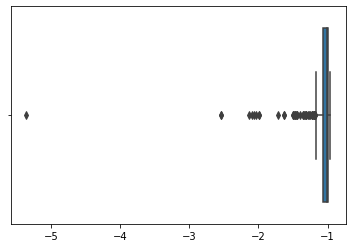

In [21]:
sns.boxplot(df_scores);

In [22]:
threshold=np.sort(df_scores)[7]
print(threshold)
df = df.loc[df_scores > threshold]
df = df.reset_index(drop=True)

-1.9959448520295393


In [23]:
df.shape

(314, 21)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AtBat       314 non-null    int64   
 1   Hits        314 non-null    int64   
 2   HmRun       314 non-null    int64   
 3   Runs        314 non-null    int64   
 4   RBI         314 non-null    int64   
 5   Walks       314 non-null    int64   
 6   Years       314 non-null    int64   
 7   CAtBat      314 non-null    int64   
 8   CHits       314 non-null    int64   
 9   CHmRun      314 non-null    int64   
 10  CRuns       314 non-null    int64   
 11  CRBI        314 non-null    int64   
 12  CWalks      314 non-null    int64   
 13  League      314 non-null    object  
 14  Division    314 non-null    object  
 15  PutOuts     314 non-null    int64   
 16  Assists     314 non-null    int64   
 17  Errors      314 non-null    int64   
 18  Salary      314 non-null    float64 
 19  NewLeagu

In [25]:
cat_features = ['League','Division','NewLeague'] 
num_features = list(df.select_dtypes(['int64']).columns)

In [26]:
cat_features

['League', 'Division', 'NewLeague']

In [27]:
corr = df.corr()

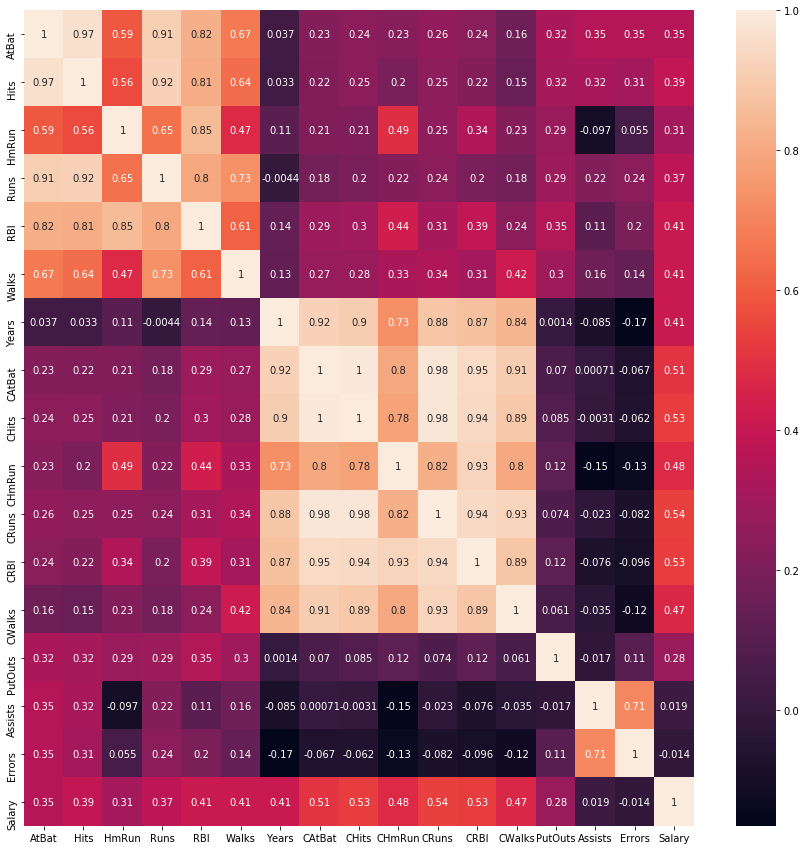

In [28]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

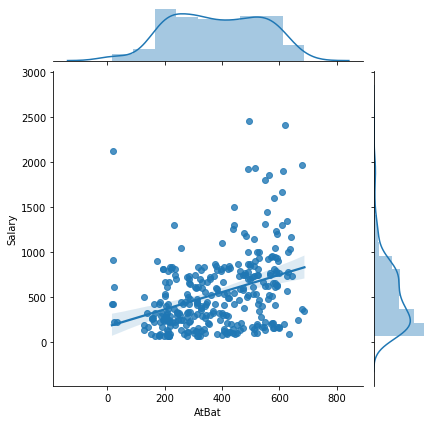

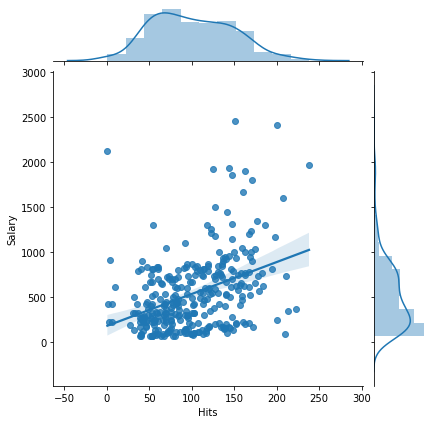

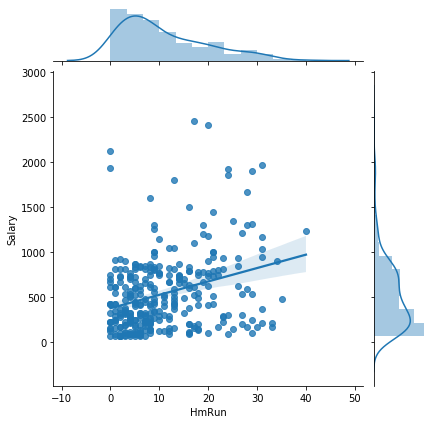

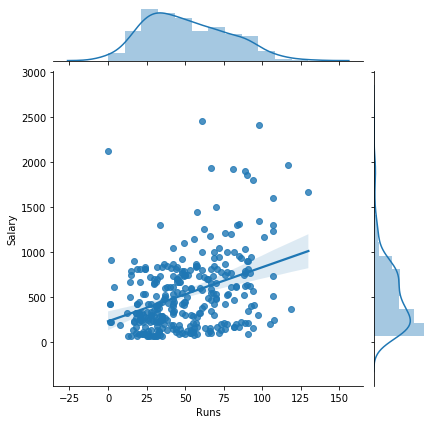

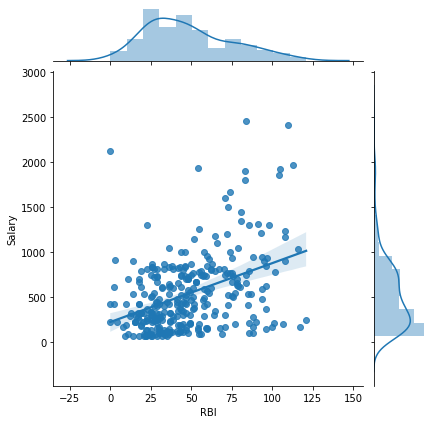

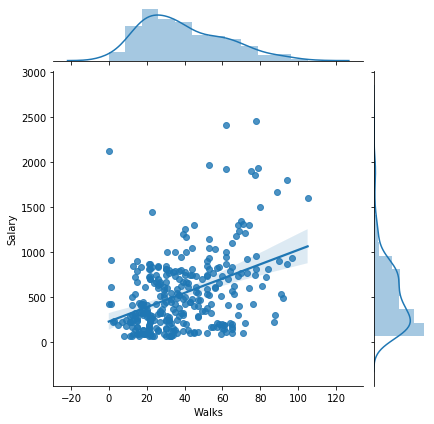

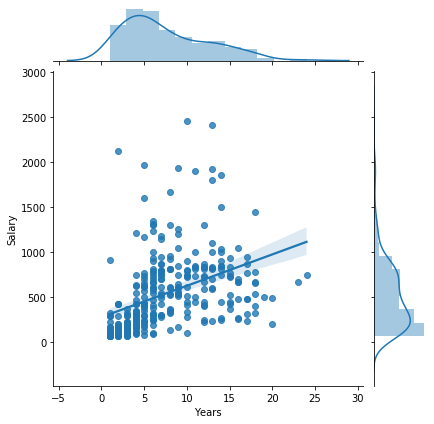

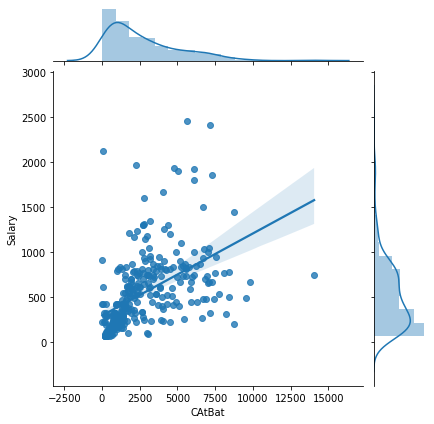

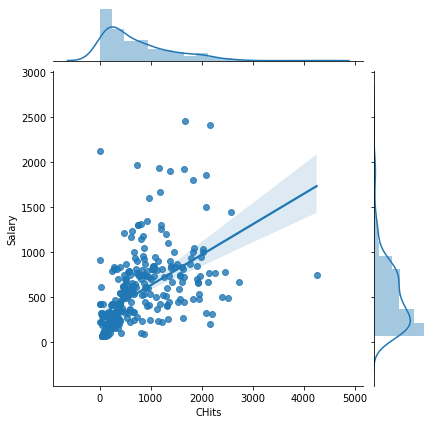

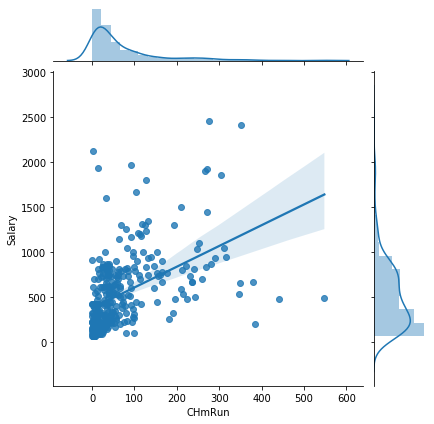

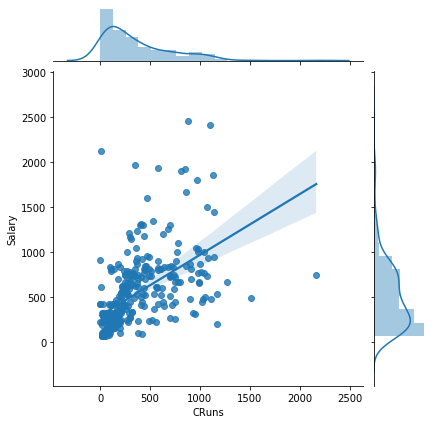

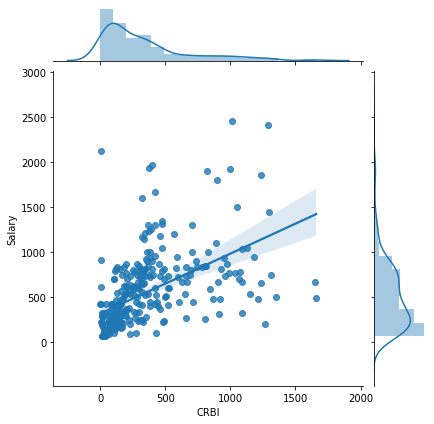

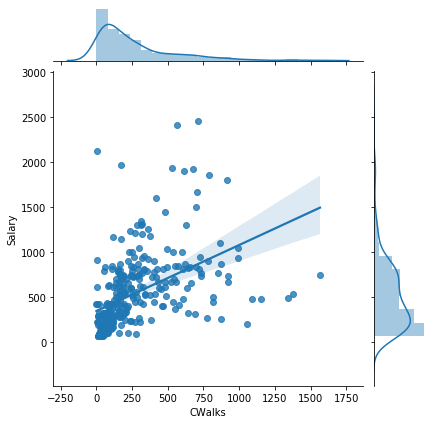

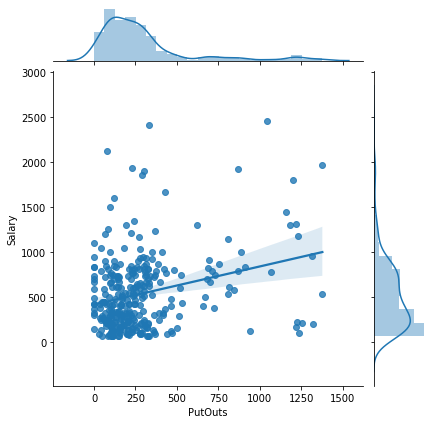

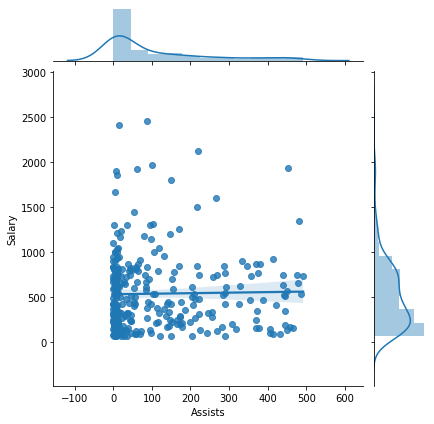

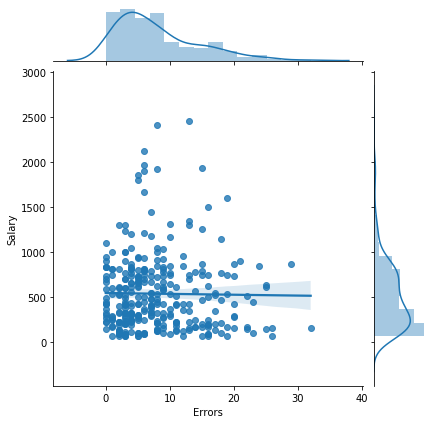

In [29]:
for col in num_features:
    #sns.scatterplot(x=col ,y='Salary',data=df,hue='League')
    sns.jointplot(x =col, y = 'Salary', data = df, kind = "reg")
    plt.show()

In [30]:
df.groupby('League').mean().T

League,A,N
AtBat,394.713450,364.909091
Hits,105.222222,96.174825
HmRun,12.333333,9.076923
Runs,54.631579,46.895105
RBI,51.690058,43.944056
Walks,39.795322,37.839161
Years,7.730994,7.188811
CAtBat,2733.228070,2580.230769
CHits,739.847953,700.888112
CHmRun,78.578947,59.783217


In [31]:
df.groupby('Division').mean().T

Division,E,W
AtBat,389.745098,372.962733
Hits,104.973856,97.422360
HmRun,11.000000,10.708075
Runs,53.300654,49.024845
RBI,50.333333,46.099379
Walks,40.431373,37.453416
Years,7.424837,7.540373
CAtBat,2619.183007,2705.714286
CHits,715.333333,728.540373
CHmRun,69.130719,70.863354


In [32]:
df.groupby('NewLeague').mean().T

NewLeague,A,N
AtBat,389.532164,371.104895
Hits,103.836257,97.832168
HmRun,12.298246,9.118881
Runs,53.941520,47.720280
RBI,51.298246,44.412587
Walks,39.385965,38.328671
Years,7.742690,7.174825
CAtBat,2720.812865,2595.076923
CHits,734.146199,707.706294
CHmRun,78.900585,59.398601


Exploring LEAGUE feature
A    0.544586
N    0.455414
Name: League, dtype: float64


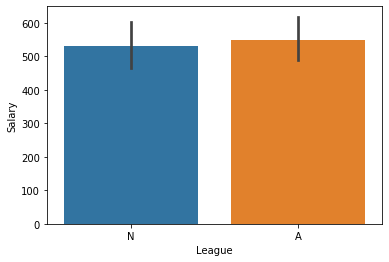

Exploring DIVISION feature
W    0.512739
E    0.487261
Name: Division, dtype: float64


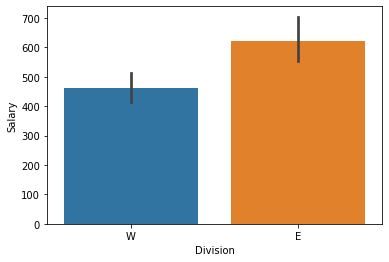

Exploring NEWLEAGUE feature
A    0.544586
N    0.455414
Name: NewLeague, dtype: float64


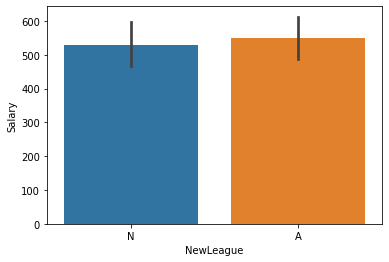

In [33]:
for col in cat_features:
    print('Exploring {} feature'.format(col.upper()))
    print(df[col].value_counts(normalize=True,ascending=False))
    sns.barplot(x=col, y="Salary", data=df)
    plt.show()

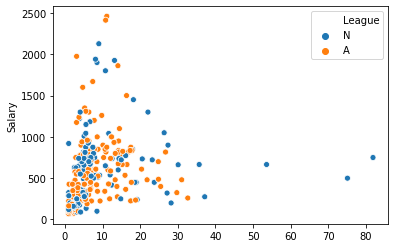

In [34]:
sns.scatterplot(x=df['CHits']/df['Hits'] ,y='Salary',data=df,hue='League')
plt.show()

In [36]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Experience
0,323,81,6,26,32,8,2,341,86,6,...,34,8,N,W,143,290,19,75.000,N,1
1,401,92,17,49,66,65,13,5206,1332,253,...,890,866,A,E,0,0,0,1100.000,A,3
2,574,159,21,107,75,59,10,4631,1300,90,...,504,488,A,E,238,445,22,517.143,A,2
3,202,53,4,31,26,27,9,1876,467,15,...,186,161,N,W,304,45,11,512.500,N,2
4,418,113,13,48,61,47,4,1512,392,41,...,204,203,N,E,211,11,7,550.000,N,1


In [37]:
df['Experience'] = pd.cut(df['Years'],[0,5,10,15,25],labels=[1,2,3,4])

In [38]:
df['Experience'].value_counts()

1    137
2     96
3     55
4     26
Name: Experience, dtype: int64

In [39]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Experience
0,323,81,6,26,32,8,2,341,86,6,...,34,8,N,W,143,290,19,75.000,N,1
1,401,92,17,49,66,65,13,5206,1332,253,...,890,866,A,E,0,0,0,1100.000,A,3
2,574,159,21,107,75,59,10,4631,1300,90,...,504,488,A,E,238,445,22,517.143,A,2
3,202,53,4,31,26,27,9,1876,467,15,...,186,161,N,W,304,45,11,512.500,N,2
4,418,113,13,48,61,47,4,1512,392,41,...,204,203,N,E,211,11,7,550.000,N,1


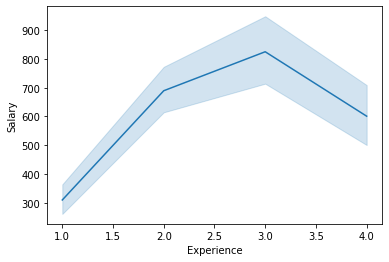

In [40]:
sns.lineplot(x='Experience', y="Salary", data=df, estimator=np.mean)

In [41]:
df['CRBI_bins'] = pd.cut(df['CRBI'],4,labels=[1,2,3,4])

In [42]:
cat_features.extend(['Experience','CRBI_bins'])

In [43]:
cat_features

['League', 'Division', 'NewLeague', 'Experience', 'CRBI_bins']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AtBat       314 non-null    int64   
 1   Hits        314 non-null    int64   
 2   HmRun       314 non-null    int64   
 3   Runs        314 non-null    int64   
 4   RBI         314 non-null    int64   
 5   Walks       314 non-null    int64   
 6   Years       314 non-null    int64   
 7   CAtBat      314 non-null    int64   
 8   CHits       314 non-null    int64   
 9   CHmRun      314 non-null    int64   
 10  CRuns       314 non-null    int64   
 11  CRBI        314 non-null    int64   
 12  CWalks      314 non-null    int64   
 13  League      314 non-null    object  
 14  Division    314 non-null    object  
 15  PutOuts     314 non-null    int64   
 16  Assists     314 non-null    int64   
 17  Errors      314 non-null    int64   
 18  Salary      314 non-null    float64 
 19  NewLeagu

In [45]:
df['New_HitRate']=df["CAtBat"]/df["CHits"]
df['New_AtBat']=df["CAtBat"]/df["AtBat"]
df['New_RBI']=df["CRBI"]/df["RBI"]
df['New_Walks']=df["CWalks"]/df["Walks"]
df['New_Hits']=df["CHits"]/df["Hits"]
df['New_HmRun']=df["CHmRun"]/df["HmRun"]
df['New_Runs']=df["CRuns"]/df["Runs"]
df['New_ChmrunRate']=df["CHmRun"]/df["CHits"]
df['New_Cat']=df["CAtBat"]/df["CRuns"]
df['New_Assist']=df["Hits"]/df["Assists"]
 

In [46]:
num_features.extend(['New_HitRate','New_RBI','New_Walks','New_Hits','New_HmRun','New_Runs','New_ChmrunRate','New_AtBat','New_Cat','New_Assist'])

In [47]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [48]:
df = pd.get_dummies(df, columns = cat_features, drop_first = True)

In [49]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,New_Assist,League_N,Division_W,NewLeague_N,Experience_2,Experience_3,Experience_4,CRBI_bins_2,CRBI_bins_3,CRBI_bins_4
0,323,81,6,26,32,8,2,341,86,6,...,0.279310,1,1,1,0,0,0,0,0,0
1,401,92,17,49,66,65,13,5206,1332,253,...,inf,0,0,0,0,1,0,0,1,0
2,574,159,21,107,75,59,10,4631,1300,90,...,0.357303,0,0,0,1,0,0,1,0,0
3,202,53,4,31,26,27,9,1876,467,15,...,1.177778,1,1,1,1,0,0,0,0,0
4,418,113,13,48,61,47,4,1512,392,41,...,10.272727,1,0,1,0,0,0,0,0,0


In [50]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

df[num_features] = std_scaler.fit_transform(df[num_features])

In [52]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,New_Assist,League_N,Division_W,NewLeague_N,Experience_2,Experience_3,Experience_4,CRBI_bins_2,CRBI_bins_3,CRBI_bins_4
0,-0.474478,-0.524758,-0.619617,-1.050011,-0.688759,-1.505168,-1.142991,-1.042967,-1.018006,-0.766407,...,-0.623587,1,1,1,0,0,0,0,0,0
2,1.212098,1.181981,1.138416,2.101695,0.978185,0.925824,0.566899,0.935710,0.972369,0.274720,...,-0.617762,0,0,0,1,0,0,1,0,0
3,-1.287529,-1.137434,-0.854022,-0.855461,-0.921356,-0.599505,0.353163,-0.334979,-0.393349,-0.654858,...,-0.556477,1,1,1,1,0,0,0,0,0
4,0.163867,0.175442,0.200798,-0.193992,0.435459,0.353826,-0.715519,-0.502866,-0.516313,-0.332604,...,0.122864,1,0,1,0,0,0,0,0,0
6,-1.327845,-1.356247,-0.502415,-0.933281,-0.882589,-0.456505,1.208108,0.289988,0.193598,-0.394576,...,-0.573076,1,0,1,0,1,0,0,0,0


In [53]:
y = df["Salary"]
X = df.drop('Salary', axis=1)

In [54]:
from sklearn.feature_selection import RFECV #Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.ensemble import RandomForestRegressor

def select_features(X,y):
    # numerik olmayan degiskenlerin silinmesi
    X = X.select_dtypes([np.number]).dropna(axis=1)
    
    clf = RandomForestRegressor(random_state=46)
    clf.fit(X, y)
    
    selector = RFECV(clf,cv=10)
    selector.fit(X, y)
    
    features = pd.DataFrame()
    features['Feature'] = X.columns
    features['Importance'] = clf.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.set_index('Feature', inplace=True)
    features.plot(kind='bar', figsize=(12, 5))
    
    
    best_columns = list(X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

Best Columns 
------------
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'New_HitRate', 'New_AtBat', 'New_RBI', 'New_HmRun', 'New_ChmrunRate', 'New_Cat', 'New_Assist']



['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'New_HitRate',
 'New_AtBat',
 'New_RBI',
 'New_HmRun',
 'New_ChmrunRate',
 'New_Cat',
 'New_Assist']

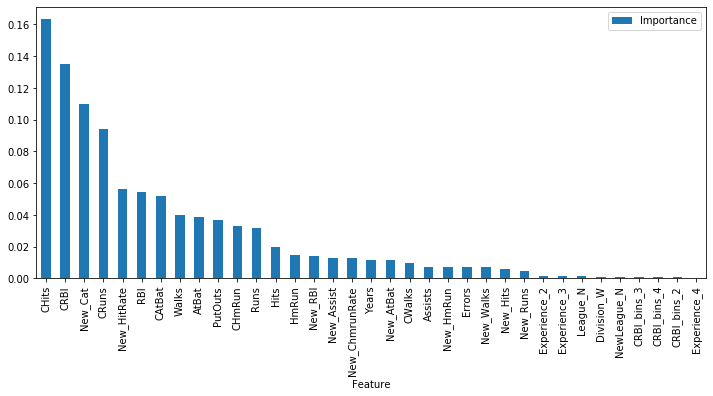

In [55]:
best_features = select_features(X,y)
best_features

In [56]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,New_Assist,League_N,Division_W,NewLeague_N,Experience_2,Experience_3,Experience_4,CRBI_bins_2,CRBI_bins_3,CRBI_bins_4
0,-0.474478,-0.524758,-0.619617,-1.050011,-0.688759,-1.505168,-1.142991,-1.042967,-1.018006,-0.766407,...,-0.623587,1,1,1,0,0,0,0,0,0
2,1.212098,1.181981,1.138416,2.101695,0.978185,0.925824,0.566899,0.935710,0.972369,0.274720,...,-0.617762,0,0,0,1,0,0,1,0,0
3,-1.287529,-1.137434,-0.854022,-0.855461,-0.921356,-0.599505,0.353163,-0.334979,-0.393349,-0.654858,...,-0.556477,1,1,1,1,0,0,0,0,0
4,0.163867,0.175442,0.200798,-0.193992,0.435459,0.353826,-0.715519,-0.502866,-0.516313,-0.332604,...,0.122864,1,0,1,0,0,0,0,0,0
6,-1.327845,-1.356247,-0.502415,-0.933281,-0.882589,-0.456505,1.208108,0.289988,0.193598,-0.394576,...,-0.573076,1,0,1,0,1,0,0,0,0


Model Traning

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=46)

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

 Lineer Regression

In [60]:
lr_model = LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [62]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_rmse

281.57546298439485

In [63]:
lr_cv_rmse =  np.sqrt(np.mean(-cross_val_score(lr_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
lr_cv_rmse

292.3678256969378

In [65]:
np.sqrt(-cross_val_score(lr_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([345.58505967, 231.26537275, 263.0003529 , 267.4014883 ,
       285.24956163, 328.77590479, 370.55964246, 319.64599529,
       234.22598603, 239.56893771])

In [66]:
coefs = pd.DataFrame(lr_model.coef_, index = X_train.columns)
coefs

,0
AtBat,-8.008693
Hits,16.003802
HmRun,63.728529
Runs,42.277302
RBI,-99.004788
Walks,17.300843
Years,-58.085436
CAtBat,-1012.077983
CHits,810.496276
CHmRun,47.735852


In [67]:
intercept = lr_model.intercept_
intercept

656.1402539542421

Ridge Regression

In [68]:
ridge_model = Ridge()
ridge_model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [70]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_rmse

292.8443339381929

In [71]:
ridge_cv_rmse =  np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
ridge_cv_rmse

278.1903899223087

In [72]:
np.sqrt(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([268.67060763, 240.43638271, 245.08323945, 273.88885806,
       274.38727629, 331.39562159, 374.23714013, 275.92216186,
       233.38956484, 230.33861869])

In [73]:
pd.Series(ridge_model.coef_, index = X_train.columns)

AtBat             -78.855574
Hits               84.584363
HmRun              55.770957
Runs               36.590312
RBI               -77.588680
Walks              36.660860
Years             -67.172229
CAtBat           -234.195045
CHits             176.130333
CHmRun             58.710827
CRuns             140.425339
CRBI              297.566430
CWalks             60.902187
PutOuts            24.922399
Assists           -34.300373
Errors             -7.150386
New_HitRate       -67.571862
New_AtBat        -137.900918
New_RBI            71.001625
New_Walks          27.119967
New_Hits          -29.519859
New_HmRun         -70.868654
New_Runs           18.390776
New_ChmrunRate    -19.917418
New_Cat            39.353573
New_Assist        -19.236069
League_N          -23.771191
Division_W        -95.700540
NewLeague_N        -5.488523
Experience_2      200.454055
Experience_3      105.187818
Experience_4     -249.448943
CRBI_bins_2      -192.516008
CRBI_bins_3      -349.390050
CRBI_bins_4   

Lasso Regression

In [74]:
lasso_model = Lasso()
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
lasso_model.fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)

In [76]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_rmse

293.16859037106497

In [77]:
lasso_cv_rmse =  np.sqrt(np.mean(-cross_val_score(lasso_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
lasso_cv_rmse 

281.3111679998962

In [78]:
np.sqrt(-cross_val_score(lasso_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([287.08084567, 239.40565024, 244.01890863, 277.6489533 ,
       274.32812804, 342.93636607, 370.62879823, 275.68763933,
       235.61297973, 230.76168719])

In [79]:
pd.Series(lasso_model.coef_, index = X_train.columns)

AtBat             -30.534411
Hits               62.587829
HmRun              50.672091
Runs               19.184585
RBI               -93.984185
Walks              36.415176
Years             -24.701387
CAtBat           -254.718306
CHits              54.615922
CHmRun              0.000000
CRuns             215.273297
CRBI              431.898128
CWalks             51.359263
PutOuts            23.521028
Assists           -35.093440
Errors             -5.419264
New_HitRate       -74.480502
New_AtBat        -105.139873
New_RBI            29.216875
New_Walks          22.264218
New_Hits          -13.061070
New_HmRun         -68.199190
New_Runs           -0.000000
New_ChmrunRate     -7.983935
New_Cat            37.903059
New_Assist        -17.763103
League_N          -26.300557
Division_W        -92.192077
NewLeague_N        -0.390423
Experience_2      169.351467
Experience_3       37.680647
Experience_4     -326.034865
CRBI_bins_2      -194.955677
CRBI_bins_3      -401.282325
CRBI_bins_4   

ElasticNet Regression

In [80]:
elasticnet_model = ElasticNet()
elasticnet_model

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
elasticnet_model.fit(X_train, y_train)
y_pred = elasticnet_model.predict(X_test)

In [82]:
elasticnet_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
elasticnet_rmse

296.4648492355854

In [83]:
elasticnet_cv_rmse =  np.sqrt(np.mean(-cross_val_score(elasticnet_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
elasticnet_cv_rmse 

291.69366512754885

In [84]:
np.sqrt(-cross_val_score(elasticnet_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

array([267.31896367, 261.27945324, 247.82747145, 288.14228854,
       306.04101381, 296.78241473, 401.60541419, 231.18205736,
       329.23726298, 248.61817343])

In [85]:
pd.Series(elasticnet_model.coef_, index = X_train.columns)

AtBat              7.685263
Hits              28.509731
HmRun             12.349340
Runs              19.197475
RBI                8.769874
Walks             34.625526
Years             15.840734
CAtBat            27.196105
CHits             39.181593
CHmRun            44.996090
CRuns             42.641144
CRBI              42.331975
CWalks            28.060953
PutOuts           22.066645
Assists          -17.940685
Errors           -14.786362
New_HitRate      -60.242509
New_AtBat         -9.197527
New_RBI            7.688824
New_Walks        -19.780199
New_Hits          -8.645028
New_HmRun        -12.329237
New_Runs         -11.911390
New_ChmrunRate    -1.296206
New_Cat            7.001144
New_Assist        -7.666026
League_N          -2.990061
Division_W       -36.440723
NewLeague_N       -1.051132
Experience_2      54.054659
Experience_3      16.510574
Experience_4     -24.973448
CRBI_bins_2        0.000000
CRBI_bins_3       -8.998933
CRBI_bins_4        6.752426
dtype: float64

Model Tuning

Ridge Regression Tuning

In [86]:
ridge_params = {'alpha' :10**np.linspace(10,-2,100)*0.5 ,
                'solver' : ['auto', 'svd', 'cholesky', 'lsqr']}
ridge_model = Ridge()
ridge_gridcv_model = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
ridge_gridcv_model.best_params_

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:   27.0s finished


{'alpha': 9.369087114301934, 'solver': 'lsqr'}

In [87]:
ridge_tuned_model = Ridge(**ridge_gridcv_model.best_params_)

In [88]:
ridge_tuned_model.fit(X_train, y_train)
y_pred = ridge_tuned_model.predict(X_test)

In [89]:
ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_tuned_rmse

288.5902217644637

In [90]:
ridge_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(ridge_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
ridge_tuned_cv_rmse 

275.4964718088429

In [91]:
ridge_model = Ridge()
coefs = []

for i in 10**np.linspace(10,-2,100)*0.5 :
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    print(mean_squared_error(y_test, y_pred, squared=False))

378.0118655585731
378.01184456685746
378.01181681705754
378.0117801334776
378.0117316399828
378.0116675345051
378.0115827909555
378.01147076517907
378.01132267406007
378.0111269069534
378.01086811547316
378.0105260103127
378.0100737708246
378.0094759427791
378.00868565967113
378.0076409700595
378.00625998358737
378.0044344561616
378.0020213131785
377.99883144938974
377.99461493287816
377.9890414628669
377.98167456628374
377.9719375398629
377.95906851967845
377.94206124644234
377.9195870412168
377.88989215121273
377.85066290005466
377.798848910505
377.7304320016947
377.64012518005313
377.52098252199806
377.3638969610604
377.1569596854986
376.88465332802747
376.52685381990005
376.0576269623557
375.4438325506505
374.64360239889214
373.60485491971957
372.26416837324905
370.54657713170263
368.36718442084504
365.63585752380743
362.26654132116965
358.19257760677345
353.3883431367655
347.8949748697843
341.8438653054397
335.46723880190973
329.08361192966316
323.05127076522933
317.69628765743056

Lasso Regression Tuning

In [92]:
lasso_params = {'alpha':np.linspace(0,1,1000)}

lasso_model = Lasso(tol = 0.001)
lasso_gridcv_model = GridSearchCV(estimator=lasso_model, param_grid = lasso_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
lasso_gridcv_model.best_params_

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 2720 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 7904 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   49.2s finished


{'alpha': 0.8218218218218218}

In [93]:
lasso_tuned_model = Lasso(**lasso_gridcv_model.best_params_)

In [94]:
lasso_tuned_model.fit(X_train, y_train)
y_pred = lasso_tuned_model.predict(X_test)

In [95]:
lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_tuned_rmse

292.5657190469338

In [96]:
lasso_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(lasso_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
lasso_tuned_cv_rmse

281.2231078864082

ElasticNet Regression Tuning

In [97]:
elasticnet_params = {"l1_ratio": [0.1,0.4,0.5,0.6,0.8,1],
                     "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1],
                    }
elasticnet_model = ElasticNet()
elasticnet_gridcv_model = GridSearchCV(estimator=elasticnet_model, param_grid=elasticnet_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
elasticnet_gridcv_model.best_params_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    2.0s finished


{'alpha': 0.1, 'l1_ratio': 0.5}

In [98]:
elasticnet_tuned_model = ElasticNet(**elasticnet_gridcv_model.best_params_)

In [99]:
elasticnet_tuned_model.fit(X_train, y_train)
y_pred = elasticnet_tuned_model.predict(X_test)

In [100]:
elasticnet_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
elasticnet_tuned_rmse

288.63097791823816

In [101]:
elasticnet_tuned_cv_rmse =  np.sqrt(np.mean(-cross_val_score(elasticnet_tuned_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
elasticnet_tuned_cv_rmse 

276.00932625416976

Model Selecting

In [102]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

def select_model(X,y):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=46)
    
    models = [ 
        {
            "name": "RidgeRegression",
            "estimator": Ridge(),
            "hyperparameters":
                {
                 'alpha' :np.linspace(0,1,100) ,
                 'solver' : ['auto', 'svd', 'cholesky', 'lsqr']
                }
        },
        {
            "name": "LassoRegression",
            "estimator": Lasso(),
            "hyperparameters":
                {
                 'alpha' :np.linspace(0,1,100) ,
                }
        },
        {
            "name": "ElasticNetRegression",
            "estimator": ElasticNet(),
            "hyperparameters":
                {
                 "l1_ratio": np.linspace(0,1,30), # [0.1,0.4,0.5,0.6,0.8,1],
                 "alpha":np.linspace(0,1,100), # [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
                }
        },
       
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10,scoring="neg_mean_squared_error")
        grid.fit(X_train, y_train)
        
        model["best_params"] = grid.best_params_
        #model["best_score"] = grid.best_score_
        model["tuned_model"] = grid.best_estimator_
        
        model["train_rmse_score"] = np.sqrt(mean_squared_error(y_train, model["tuned_model"].fit(X_train,y_train).predict(X_train)))
        model["validation_rmse_score"] = np.sqrt(np.mean(-cross_val_score(model["tuned_model"], X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
        model["test_rmse_score"] = np.sqrt(mean_squared_error(y_test, model["tuned_model"].fit(X_train,y_train).predict(X_test)))
      
        #print("Best ......... Score: {}".format(model["best_score"]))
        print("Best TRAIN RMSE Score: {}".format(model["train_rmse_score"]))
        print("Best VALIDATION RMSE Score: {}".format(model["validation_rmse_score"]))
        print("Best TEST RMSE Score: {}".format(model["test_rmse_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))


In [103]:
select_model(X,y)

RidgeRegression
---------------
Best TRAIN RMSE Score: 229.6831718533366
Best VALIDATION RMSE Score: 277.75382693474825
Best TEST RMSE Score: 293.67070644226266
Best Parameters: {'alpha': 1.0, 'solver': 'lsqr'}

LassoRegression
---------------
Best TRAIN RMSE Score: 228.455824889799
Best VALIDATION RMSE Score: 281.22254075098084
Best TEST RMSE Score: 292.5395892833245
Best Parameters: {'alpha': 0.8181818181818182}

ElasticNetRegression
--------------------
Best TRAIN RMSE Score: 236.02007617760594
Best VALIDATION RMSE Score: 273.9123675548953
Best TEST RMSE Score: 289.94863420791046
Best Parameters: {'alpha': 0.020202020202020204, 'l1_ratio': 0.0}

